In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=4b383edcff3f6ee3003e681aef133e1a79c8017523352606b58bccde764f40e3
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark import SparkContext

In [ ]:
spark = SparkSession.builder.master('local[1]').appName('CS_DATA').getOrCreate()

In [ ]:
sc = SparkContext

In [ ]:
Pyspark_df = spark.read.option('header', True).csv("/content/export.csv")

In [ ]:
Pyspark_df.show()

+--------------------------+------------------------+--------------------+-----------------------+--------------------------+--------------------+----------------------+-----------------------+------------------------+--------------------+--------------------------+-----------------------+----------------------------+---------------------+----------------------+----------------------------------+------------------------+-------------------------------------+-----------------------------+------------------------------------+----------------------------------------+--------------------------------------+----------------------------+----------------------------------+--------------------------------------+-----------------------------+-----------------------------------+---------------------------------+---------------------------------------+------------------------------+------------------------------+--------------------+----------------+----------------------------------+-------------

+----------------------------+-----+
|msg_WebContext_Page_Referrer|count|
+----------------------------+-----+
|        https://www.googl...| 1857|
|        https://www.googl...|  204|
|        https://www.bing....|  170|
|        http://m.facebook...|  129|
|        https://www.lonel...|  120|
+----------------------------+-----+

2480
+----------------------------+-----+--------------------+
|msg_WebContext_Page_Referrer|count|          percentage|
+----------------------------+-----+--------------------+
|        https://www.googl...| 1857|  0.7487903225806452|
|        https://www.googl...|  204| 0.08225806451612903|
|        https://www.bing....|  170| 0.06854838709677419|
|        http://m.facebook...|  129|0.052016129032258066|
|        https://www.lonel...|  120| 0.04838709677419355|
+----------------------------+-----+--------------------+



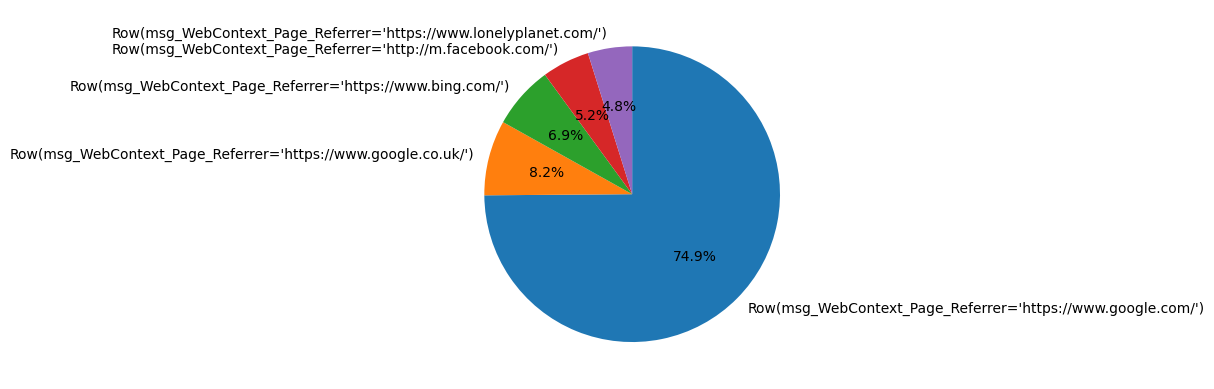

In [ ]:
#Engagement Duration
#1. Top Pages with Maximum Enagement Duration
#2. pie chart showing the breakdown of msg_WebContext_Page_Referrer and further breakdown each portion of msg_WebContext_Page_Referrer with percentage of msg_Geography_Country_Name
#Group by referral site

import pyspark.sql.functions as F
import matplotlib.pyplot as plt
from pyspark.sql.window import Window
from pyspark.sql.functions import rank, col



# Calculate the counts and percentages of referrers by country
Pyspark_df = Pyspark_df.na.drop(subset=["msg_WebContext_Page_Referrer", "msg_Geography_Country_Name"])

# ref_country_counts = (
#     Pyspark_df.groupBy("msg_WebContext_Page_Referrer", "msg_Geography_Country_Name").count().orderBy(Pyspark_df['count'].desc())
# )
ref_country_counts = Pyspark_df.groupBy("msg_WebContext_Page_Referrer").count().orderBy(col('count').desc()).limit(5)
ref_country_counts.show()
# window = Window.partitionBy(ref_country_counts['msg_WebContext_Page_Referrer']).orderBy(ref_country_counts['count'].desc())
# ref_country_counts = ref_country_counts.select('*', rank().over(window).alias('rank')).filter(col('rank') <= 5)
# ref_country_counts.show()



# Calculate the total counts and percentages of referrers
# ref_counts = (
#     ref_country_counts.groupBy("msg_WebContext_Page_Referrer")
#     .agg(F.sum("count").alias("total_count"))
#     .orderBy("total_count")
# )

# ref_counts.show()
print(ref_country_counts.select(F.sum("count")).collect()[0][0])
ref_counts = ref_country_counts.withColumn(
    "percentage", F.col("count")/ref_country_counts.select(F.sum("count")).collect()[0][0])
ref_counts.show()
listValues= ref_counts.select("total_count").rdd.map(lambda x : x[0]).collect()


# Create the pie chart
fig, ax = plt.subplots()
ax.axis("equal")
pie_wedge_collection, texts, autotexts = ax.pie(
    listValues,
    labels=ref_counts.select("msg_WebContext_Page_Referrer").collect(),
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
)

# # # Add the country percentages to each wedge
# # for i, pie_wedge in enumerate(pie_wedge_collection):
# #     referrer = ref_counts.select("msg_WebContext_Page_Referrer").collect()[i][0]
# #     country_percentages = ref_country_counts.filter(
# #         F.col("msg_WebContext_Page_Referrer") == referrer
# #     ).select("msg_Geography_Country_Name", "count").collect()
# #     total_count = sum(row[1] for row in country_percentages)
# #     country_percentages = [        (row[0], row[1] / total_count) for row in country_percentages
# #     ]
# #     pie_wedge.set_label(
# #         "{}\n{}".format(
# #             referrer,
# #             "\n".join(
# #                 [
# #                     "{} ({:.1f}%)".format(row[0], row[1] * 100)
# #                     for row in country_percentages
# #                 ]
# #             ),
# #         )
# #     )

# # Show the pie chart
# plt.show()



In [ ]:
from pyspark.sql.functions import col, desc, window, dense_rank, col
# Pyspark_df = Pyspark_df.select(Pyspark_df.msg_WebContext_AnonymousId, Pyspark_df.visit_count.cast('integer'))
#Users
# Group by id and country, and count the number of occurrences
grouped = Pyspark_df.groupBy('msg_Geography_Country_Name', 'msg_WebContext_Page_Title').count()
grouped.show()

# Rank the countries within each group by their count, in descending order
# ranked = grouped.withColumn('rank', dense_rank().over(window.partitionBy('msg_WebContext_AnonymousId').orderBy(desc('count'))))

# Select the country with the highest rank (i.e., the one that appears most frequently)
# result = ranked.filter('rank = 1').select('msg_WebContext_AnonymousId', 'msg_WebContext_Page_Title', 'count')

# Print the result
# result.show()


+--------------------------+-------------------------+-----+
|msg_Geography_Country_Name|msg_WebContext_Page_Title|count|
+--------------------------+-------------------------+-----+
|                        dk|     Martinique travel...|    1|
|                        sg|     Sunset Beach | Ya...|    1|
|                        gb|     How to plan the p...|    4|
|                        qa|     Palazzo della Rag...|    1|
|                        au|     20 best free thin...|    2|
|                        fr|     Must see attracti...|    1|
|                        ch|     Erg Chigaga | Dra...|    1|
|                        us|     Must see attracti...|    1|
|                        se|     Alhambra | Granad...|    1|
|                        cn|     Switzerland trave...|    1|
|                        fr|     Must see attracti...|    2|
|                        gb|     Castello Sforzesc...|    2|
|                        sg|     The 13 best thing...|    2|
|                       

In [ ]:
# Import required libraries
from pyspark.sql.functions import col, desc, row_number
from pyspark.sql.window import Window

# Assuming that you have already loaded the data into a dataframe named 'df'

# Group the dataframe by both 'msg_Geography_Country_Name' and 'msg_WebContext_Page_Title'
# grouped_df = grouped.groupBy("msg_Geography_Country_Name", "msg_WebContext_Page_Title").count()
grouped.show()

# # Create a window partitioned by 'msg_Geography_Country_Name', ordered by count in descending order
window_spec = Window.partitionBy("msg_Geography_Country_Name").orderBy(desc("count"))

# # # Add a row number column to the grouped dataframe based on the window specification
ranked_df = grouped.withColumn("rank", row_number().over(window_spec))
# # # Filter the ranked dataframe to keep only the first row for each 'msg_Geography_Country_Name'
top_page_titles_df = ranked_df.filter(col("rank") == 1)
top_page_titles_df.show()
# # Select only the 'msg_Geography_Country_Name' and 'msg_WebContext_Page_Title' columns
result_df = top_page_titles_df.select("msg_Geography_Country_Name", "msg_WebContext_Page_Title")

# # Print the result
result_df.show()


+--------------------------+-------------------------+-----+
|msg_Geography_Country_Name|msg_WebContext_Page_Title|count|
+--------------------------+-------------------------+-----+
|                        dk|     Martinique travel...|    1|
|                        sg|     Sunset Beach | Ya...|    1|
|                        gb|     How to plan the p...|    4|
|                        qa|     Palazzo della Rag...|    1|
|                        au|     20 best free thin...|    2|
|                        fr|     Must see attracti...|    1|
|                        ch|     Erg Chigaga | Dra...|    1|
|                        us|     Must see attracti...|    1|
|                        se|     Alhambra | Granad...|    1|
|                        cn|     Switzerland trave...|    1|
|                        fr|     Must see attracti...|    2|
|                        gb|     Castello Sforzesc...|    2|
|                        sg|     The 13 best thing...|    2|
|                       

In [ ]:
pydf.select(pydf.webcontext_anonymous_id).groupBy(pydf.webcontext_anonymous_id).sum(pydf.visit_count)

TypeError: ignored

In [ ]:
new_df = pydf.select(pydf.country, pydf.device_type).filter(pydf.country.isNotNull()).limit(20)

In [ ]:
new_df.show()

+-------+-----------+
|country|device_type|
+-------+-----------+
|     ie|     Mobile|
|     gb|     Mobile|
|     nl|    Desktop|
|     gr|     Mobile|
|     es|    Desktop|
|     jo|     Mobile|
|     nl|     Mobile|
|     za|    Desktop|
|     ie|     Mobile|
|     us|     Mobile|
|     hr|    Desktop|
|     pl|    Desktop|
|     ie|    Desktop|
|     au|    Desktop|
|     es|    Desktop|
|     us|    Desktop|
|     ca|    Desktop|
|     gb|     Tablet|
|     ie|     Mobile|
|     sa|     Mobile|
+-------+-----------+



In [ ]:
new_df.columns


['country', 'device_type']

In [ ]:
pdf = pydf.toPandas()

In [ ]:
pdf['country'].value_counts()

us    585
gb    467
au    120
ca    117
it     75
     ... 
bd      1
ee      1
mz      1
ls      1
do      1
Name: country, Length: 118, dtype: int64

In [ ]:
x = pydf.select(pydf.country, pydf.device_type).groupBy(pydf.country).count()

In [ ]:
xp = x.toPandas()

In [ ]:
x.show()

+-------+-----+
|country|count|
+-------+-----+
|     cr|    5|
|     mz|    1|
|     pr|    2|
|     us|  585|
|     eg|    3|
|     ps|    1|
|     ge|    2|
|     il|   21|
|     cl|    3|
|     ro|    8|
|     sl|    1|
|     uz|    1|
|     jp|   15|
|     kw|    3|
|     lv|    2|
|     vn|   10|
|     pl|   12|
|     cn|    2|
|     za|   14|
|     vg|    1|
+-------+-----+
only showing top 20 rows



In [ ]:
print(xp)

    country  count
0        cr      5
1        mz      1
2        pr      2
3        us    585
4        eg      3
..      ...    ...
114      dk     24
115      id     11
116      bh      1
117      fi     32
118      na      1

[119 rows x 2 columns]


In [ ]:
result = px.bar(xp, x = 'country', y = 'count', color = 'country' )

In [ ]:
import plotly.express as px

In [ ]:
result.show()

In [ ]:
x.show()

+-------+-----+
|country|count|
+-------+-----+
|     cr|    5|
|     mz|    1|
|     pr|    2|
|     us|  585|
|     eg|    3|
|     ps|    1|
|     ge|    2|
|     il|   21|
|     cl|    3|
|     ro|    8|
|     sl|    1|
|     uz|    1|
|     jp|   15|
|     kw|    3|
|     lv|    2|
|     vn|   10|
|     pl|   12|
|     cn|    2|
|     za|   14|
|     vg|    1|
+-------+-----+
only showing top 20 rows



In [ ]:
x = x.withColumnRenamed('count', 'users')

In [ ]:
x.columns

['country', 'users']

In [ ]:
x.show()

+-------+-----+
|country|users|
+-------+-----+
|     cr|    5|
|     mz|    1|
|     pr|    2|
|     us|  585|
|     eg|    3|
|     ps|    1|
|     ge|    2|
|     il|   21|
|     cl|    3|
|     ro|    8|
|     sl|    1|
|     uz|    1|
|     jp|   15|
|     kw|    3|
|     lv|    2|
|     vn|   10|
|     pl|   12|
|     cn|    2|
|     za|   14|
|     vg|    1|
+-------+-----+
only showing top 20 rows



In [ ]:
xp = x.toPandas()

In [ ]:
res = px.bar(xp, x = 'country', y = 'users', color = 'country')

In [ ]:
res.show()

In [ ]:
pydf.show()

+---------------------+-----------------------+-----------+--------------+-------+---------------+--------------------+--------------+-------------+--------------------+----------------+-------------------+-----------------------+-------------+---------------+--------------------+-------------------+---------------------+-----------------------+--------------+---------------------+------------------+----------------------+------------+--------------+--------------------+-------------------+--------------------+----------------------+-------------+--------------------+------------+-------------------+---------------------------+----------------------------+-----------------------------------+--------------------+--------------------+--------------------------+--------------------------+--------------------+--------------------------+---------------------------+----------------------------------+-------+--------+----+------+------+----+-----------+------------+---------------+----------+